# Digit Recognition with Convolutional Neural Networks

In this notebook, we will build a Convolutional Neural Network (CNN) to recognize handwritten digits using the MNIST dataset. The MNIST dataset is a benchmark dataset in machine learning, consisting of 70,000 images of handwritten digits (0-9), each image being 28x28 pixels in size.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l2
from sklearn.manifold import TSNE
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
X = df.drop(labels = ['label'],axis = 1)
y = df['label']
X = X/255
X = X.values.reshape(-1,28,28,1)
y = to_categorical(y,num_classes = 10)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,random_state=0)

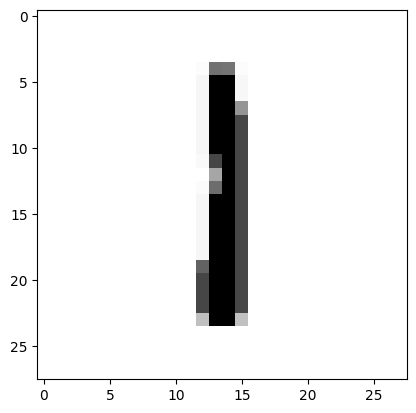

In [3]:
plt.imshow(X[2].reshape((28,28)),cmap=plt.cm.binary)

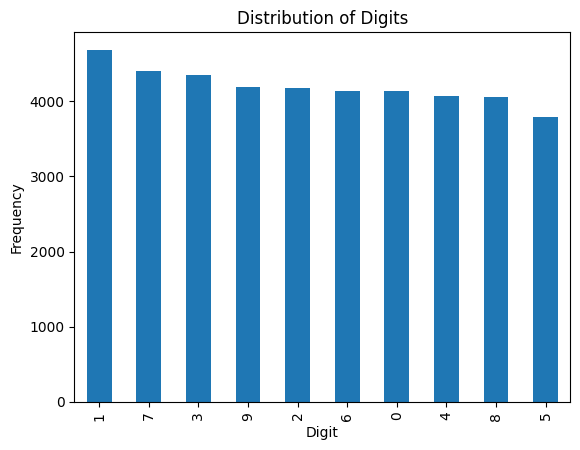

In [4]:
# Display the first few rows of the dataset
df.head()

# Visualize the distribution of digits
df['label'].value_counts().plot(kind='bar', title='Distribution of Digits')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.show()


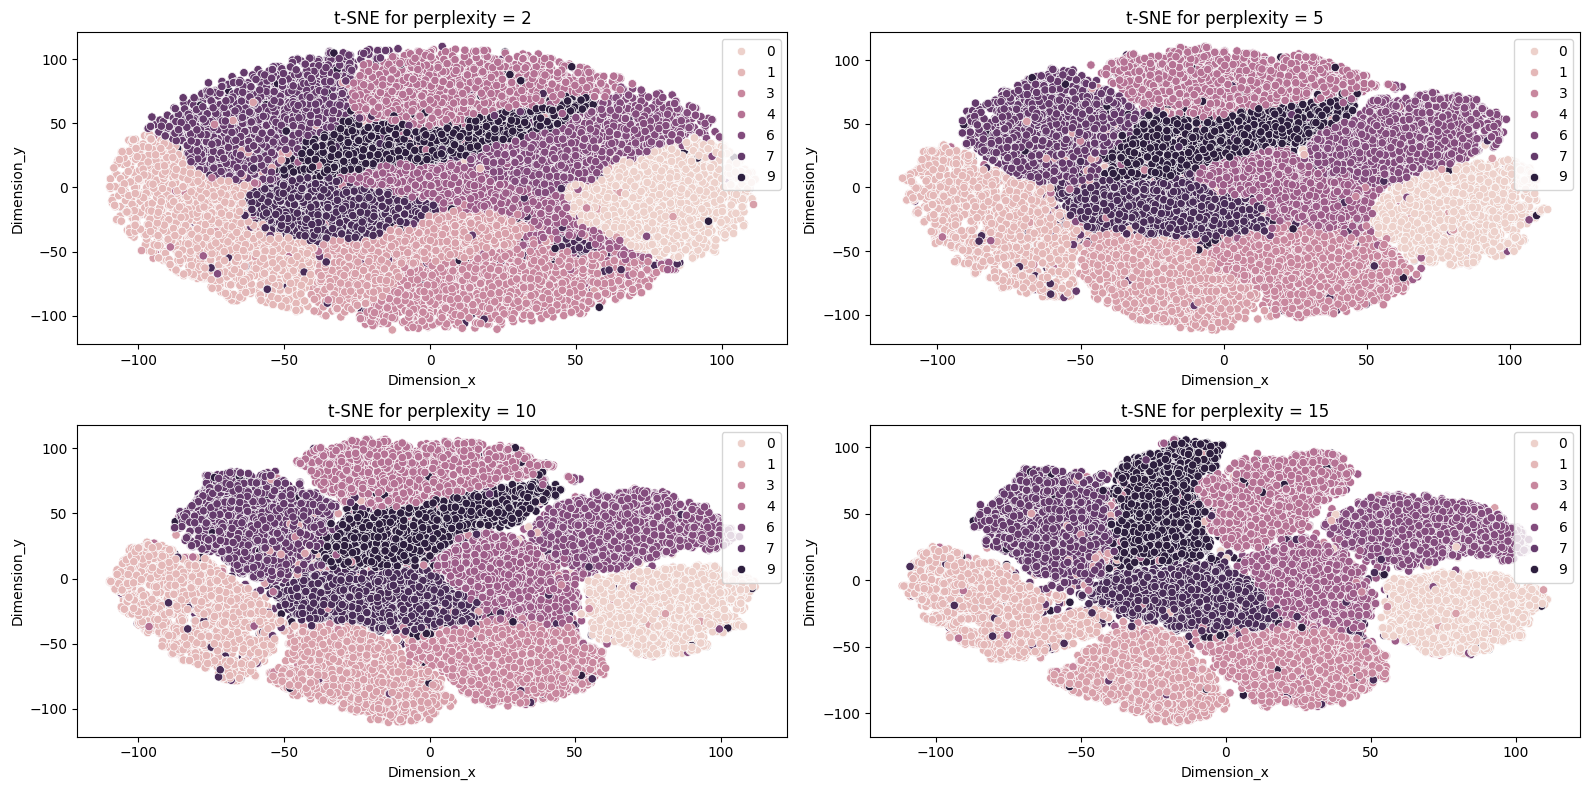

In [5]:
# Define the perplexity values
per_vals = [2, 5, 10, 15]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()
X = df.drop(labels = ['label'],axis = 1)
X = X/255
y = df['label']
# Iterate over perplexity values
for i, per in enumerate(per_vals):
    # Perform t-SNE
    X_decomposed = TSNE(n_components=2, perplexity=per).fit_transform(X)
    df_tsne = pd.DataFrame(data=X_decomposed, columns=['Dimension_x', 'Dimension_y'])
    df_tsne['Score'] = y.values
    
    # Plot t-SNE embeddings
    sns.scatterplot(data=df_tsne, x='Dimension_x', y='Dimension_y', hue='Score', ax=axes[i])
    axes[i].set_title('t-SNE for perplexity = ' + str(per))
    axes[i].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

In [6]:
# CREATE MORE IMAGES VIA DATA AUGMENTATION
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)
datagen.flow(X_train,y_train, batch_size=64),

(<keras.src.preprocessing.image.NumpyArrayIterator at 0x1f0b3d5e1f0>,)

## Model Architecture

We will use a simple CNN with the following layers:
- Convolutional layer with 16 filters and a 3x3 kernel
- MaxPooling layer with a 2x2 pool size
- Dropout layer with a rate of 0.25
- Flatten layer
- Dense layers with 512 and 1024 units and ReLU activation
- Output layer with 10 units and softmax activation
ivation


In [7]:
Model = Sequential([
    Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                     input_shape = (28, 28, 1)),
    BatchNormalization(),
    Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPool2D(strides=(2,2)),
    Dropout(0.25),
    Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPool2D(strides=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.25),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')])


In [8]:
Model.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate=1e-4), metrics=["accuracy"])
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        2320      
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 16)        64        
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 16)        0         
 D)                                                              
                                                        

In [9]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [10]:
hist = Model.fit(datagen.flow(X_train, y_train, batch_size=16),
                           epochs=20,
                           verbose=2,  
                           validation_data=(X_val, y_val), 
                           callbacks=[annealer]).history

Epoch 1/20
1477/1477 - 97s - loss: 0.5057 - accuracy: 0.8413 - val_loss: 0.0856 - val_accuracy: 0.9747 - lr: 0.0010 - 97s/epoch - 65ms/step
Epoch 2/20
1477/1477 - 88s - loss: 0.2079 - accuracy: 0.9399 - val_loss: 0.0773 - val_accuracy: 0.9773 - lr: 9.0000e-04 - 88s/epoch - 59ms/step
Epoch 3/20
1477/1477 - 82s - loss: 0.1766 - accuracy: 0.9504 - val_loss: 0.0541 - val_accuracy: 0.9844 - lr: 8.1000e-04 - 82s/epoch - 55ms/step
Epoch 4/20
1477/1477 - 82s - loss: 0.1339 - accuracy: 0.9610 - val_loss: 0.0544 - val_accuracy: 0.9836 - lr: 7.2900e-04 - 82s/epoch - 55ms/step
Epoch 5/20
1477/1477 - 79s - loss: 0.1236 - accuracy: 0.9660 - val_loss: 0.0406 - val_accuracy: 0.9881 - lr: 6.5610e-04 - 79s/epoch - 54ms/step
Epoch 6/20
1477/1477 - 81s - loss: 0.1062 - accuracy: 0.9699 - val_loss: 0.0410 - val_accuracy: 0.9893 - lr: 5.9049e-04 - 81s/epoch - 55ms/step
Epoch 7/20
1477/1477 - 90s - loss: 0.0958 - accuracy: 0.9727 - val_loss: 0.0383 - val_accuracy: 0.9898 - lr: 5.3144e-04 - 90s/epoch - 61ms/s

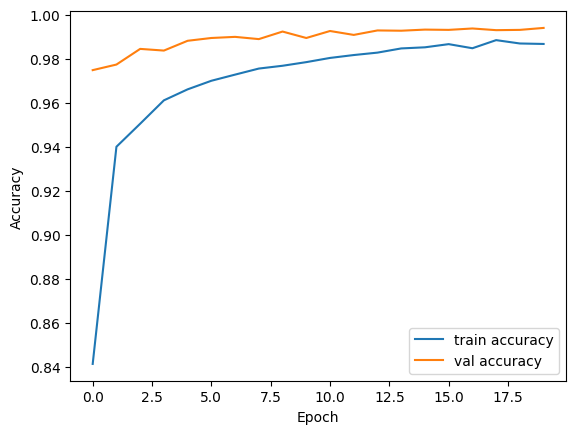

In [11]:
# Plot training and validation accuracy/loss
plt.plot(hist['accuracy'], label='train accuracy')
plt.plot(hist['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
final_loss, final_acc = Model.evaluate(X_test, y_test, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0195, final accuracy: 0.9944


## Conclusion

The CNN model achieved an accuracyf  o944 X% on thteston set. This demonstrates the effectiveness of CNNs for image classification tasks. Future work could involve experimenting with more complex architectures or applying transfer learning from pre-trained models.


## GUI

In [13]:
import tkinter as tk
import numpy as np
from PIL import Image, ImageDraw

class DigitRecognizerApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Digit Recognizer")
        
        self.canvas = tk.Canvas(root, width=280, height=280, bg='white')
        self.canvas.pack()
        
        self.button_predict = tk.Button(root, text='Predict', command=self.predict_digit)
        self.button_predict.pack()
        
        self.button_clear = tk.Button(root, text='Clear', command=self.clear_canvas)
        self.button_clear.pack()
        
        self.canvas.bind("<B1-Motion>", self.draw)
        
        self.image = Image.new("L", (28, 28), 0)
        self.draw_obj = ImageDraw.Draw(self.image)
        
    def draw(self, event):
        x, y = event.x, event.y
        r = 8
        self.canvas.create_oval(x-r, y-r, x+r, y+r, fill='black')
        self.draw_obj.ellipse([x//10, y//10, x//10 + 1, y//10 + 1], fill='white')
    
    def predict_digit(self):
        img = self.image.resize((28, 28))
        img_array = np.array(img)
        img_array = img_array.reshape(1, 28, 28, 1).astype('float32') / 255
        
        prediction = Model.predict(img_array)
        digit = np.argmax(prediction)
        
        self.show_result(digit)
    
    def show_result(self, digit):
        result_window = tk.Toplevel(self.root)
        result_window.title("Prediction Result")
        tk.Label(result_window, text=f"Predicted Digit: {digit}", font=("Helvetica", 24)).pack()
        
    def clear_canvas(self):
        self.canvas.delete("all")
        self.image = Image.new("L", (28, 28), 0)
        self.draw_obj = ImageDraw.Draw(self.image)

# Create the main window
root = tk.Tk()
app = DigitRecognizerApp(root)
root.mainloop()


1/1 [==============================] - 0s 163ms/step
